In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [143]:
import warnings
warnings.filterwarnings("ignore")

In [144]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
train.sample(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
8378,45453274,9722,530,FORD,Fusion,2013,Sedan,No,Petrol,1.6 Turbo,201000 km,4,Tiptronic,Front,4-May,Left wheel,Silver,12
15836,45733262,9252,765,HYUNDAI,Sonata,2015,Sedan,Yes,LPG,2,571115 km,4,Automatic,Front,4-May,Left wheel,Orange,4
6904,45741094,16308,584,HYUNDAI,Elantra,2014,Sedan,No,Petrol,1.8,112000 km,4,Tiptronic,Front,4-May,Left wheel,White,10
2860,45676303,15053,777,TOYOTA,Camry,2014,Sedan,Yes,Petrol,2.5,107000 km,4,Automatic,Front,4-May,Left wheel,Black,12
1612,45810080,24085,503,TOYOTA,Aqua,2012,Hatchback,Yes,Petrol,1.5,42796 km,4,Automatic,Front,4-May,Left wheel,Red,4
12310,45428716,10349,777,SUBARU,Outback,2014,Jeep,No,Petrol,2.5,169000 km,4,Tiptronic,4x4,4-May,Left wheel,Grey,10
18457,45773501,220,259,CHEVROLET,Volt,2014,Hatchback,Yes,Hybrid,1.4,110958 km,4,Automatic,Front,4-May,Left wheel,Black,0
8315,45547047,27284,-,FORD,Fusion,2014,Sedan,Yes,Hybrid,2,138000 km,4,Tiptronic,Front,4-May,Left wheel,Black,12
12728,45235243,24148,-,TOYOTA,Prius,2013,Hatchback,No,Hybrid,1.8,118000 km,4,Automatic,Front,4-May,Left wheel,Sky blue,12
7458,45807484,9095,502,HONDA,FIT,2013,Hatchback,No,Petrol,1.5,41000 km,4,Automatic,Front,4-May,Left wheel,Blue,6


In [145]:
train['logPrice'] = np.log(train.Price)

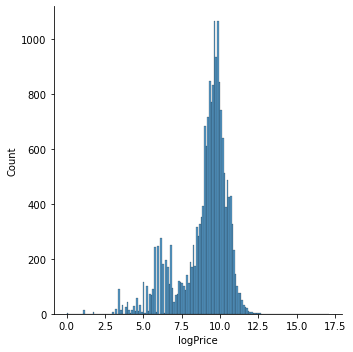

In [146]:
sns.displot(train.logPrice)

In [147]:
lowPrice = np.quantile(train.logPrice, 0.02)
highPrice = np.quantile(train.logPrice, 0.99)
print (lowPrice, highPrice)

4.700480365792417 11.346575677685973


<AxesSubplot:xlabel='cappedLogPrice', ylabel='Count'>

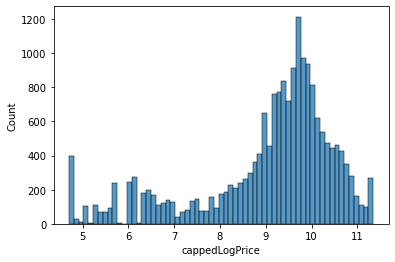

In [148]:
train['cappedLogPrice'] = train.logPrice
train.loc[train.logPrice < lowPrice, 'cappedLogPrice'] = lowPrice
train.loc[train.logPrice > highPrice, 'cappedLogPrice'] = highPrice
sns.histplot(train.cappedLogPrice)

<AxesSubplot:xlabel='cappedLogPrice'>

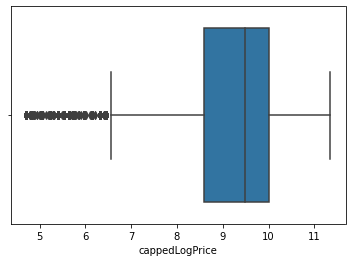

In [149]:
sns.boxplot(train.cappedLogPrice)

In [150]:
train.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'logPrice', 'cappedLogPrice'],
      dtype='object')

In [151]:
df_train = train.drop(columns=['ID', 'Price', 'logPrice'])
df_train.columns.to_list()

['Levy',
 'Manufacturer',
 'Model',
 'Prod. year',
 'Category',
 'Leather interior',
 'Fuel type',
 'Engine volume',
 'Mileage',
 'Cylinders',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel',
 'Color',
 'Airbags',
 'cappedLogPrice']

In [152]:
df_train.head()

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,cappedLogPrice
0,-,GAZ,20,1953,Sedan,No,Petrol,2,0 km,4,Manual,Rear,4-May,Left wheel,Beige,0,10.854102
1,-,GAZ,20,1953,Jeep,No,Petrol,3.2,100000 km,4,Manual,4x4,2-Mar,Left wheel,Green,0,8.070906
2,-,GAZ,21,1964,Sedan,No,Petrol,2.4,0 km,4,Manual,Rear,4-May,Left wheel,Sky blue,0,8.966994
3,-,GAZ,24,1990,Universal,Yes,Petrol,6.3,2000 km,8,Manual,4x4,2-Mar,Left wheel,Green,0,8.581294
4,-,AUDI,50,2018,Coupe,Yes,Petrol,0.5,4000 km,1,Tiptronic,Rear,>5,Right-hand drive,Blue,0,7.170120


In [153]:
cat_cols = ['Manufacturer', 'Category', 'Leather interior', 'Fuel type',
           'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']
num_cols = ['Levy', 'Prod. year', 'Engine volume', 
            'Airbags', 'Cylinders', 'Mileage']
print (len(df_train.columns.to_list()), 
        len(cat_cols),
        len(num_cols))

17 9 6


In [154]:
sorted(train.Doors.unique())

['2-Mar', '4-May', '>5']

In [155]:
top_manufacturers = df_train.Manufacturer.value_counts().head(20).reset_index()['index'].to_list()

## Mileage

In [156]:
df_train.loc[df_train.Levy=='-', 'Levy'] = 0
df_train.Mileage = train.Mileage.apply(lambda x: int(x[:-3]))
df_train.loc[df_train.Mileage==0, 'Mileage'] = None
df_train['Mileage'] = df_train['Mileage'].\
                        fillna(df_train.groupby('Prod. year')['Mileage'].transform('median'))
df_train.Mileage.fillna(df_train.Mileage.mean(), inplace=True)
df_train.Mileage = np.log(df_train.Mileage)

In [157]:
df_train[num_cols].head()

,Levy,Prod. year,Engine volume,Airbags,Cylinders,Mileage
0,0,1953,2,0,4,11.918391
1,0,1953,3.2,0,4,11.512925
2,0,1964,2.4,0,4,10.819778
3,0,1990,6.3,0,8,7.600902
4,0,2018,0.5,0,1,8.294050


In [158]:
df_train.Levy = df_train.Levy.astype(int)

In [159]:
df_train['Engine volume'] = df_train['Engine volume'].apply(lambda x: float(x.split(' ')[0]))
df_train['Engine volume'] = df_train['Engine volume'].astype(float)

In [160]:
df_train.loc[~df_train.Manufacturer.isin(top_manufacturers), 'Manufacturer'] = 'Other'
for col in cat_cols:
    print (col, ': ', len(df_train[col].unique()))

Manufacturer :  21
Category :  11
Leather interior :  2
Fuel type :  7
Gear box type :  4
Drive wheels :  3
Doors :  3
Wheel :  2
Color :  16


In [161]:
df_dummies = pd.get_dummies(df_train[cat_cols], drop_first=True)
df_dummies.tail()

,Manufacturer_BMW,Manufacturer_CHEVROLET,Manufacturer_DAEWOO,Manufacturer_DODGE,Manufacturer_FORD,Manufacturer_HONDA,Manufacturer_HYUNDAI,Manufacturer_JEEP,Manufacturer_KIA,Manufacturer_LEXUS,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
19232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
19233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
19234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
19235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
19236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Feature Engineering

<AxesSubplot:xlabel='Levy', ylabel='Count'>

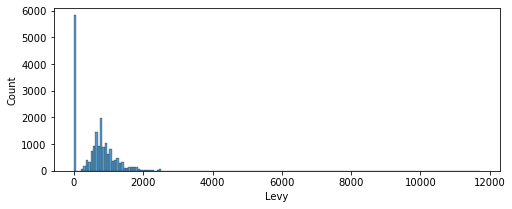

In [162]:
plt.figure(figsize=(8, 3)); sns.histplot(df_train.Levy)

In [163]:
high_levy = 2225 #np.quantile(df_train.Levy, 0.99)
#df_train.loc[df_train.Levy>2225, 'Levy'] = 2225
#plt.figure(figsize=(8, 3)); sns.histplot(df_train.Levy)

In [164]:
print (np.quantile(df_train.Mileage, 0.1), np.quantile(df_train['Prod. year'], 0.1))

10.54428741965332 2003.0


<AxesSubplot:xlabel='Prod. year'>

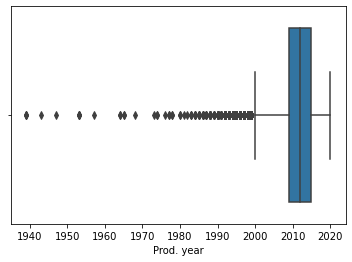

In [165]:
sns.boxplot(df_train['Prod. year'])

In [166]:
df_train['KMPerYear'] = np.log(np.exp(df_train.Mileage) / (2021 - df_train['Prod. year']))
if not 'KMPerYear' in num_cols:
    num_cols.append('KMPerYear')        

In [167]:
np.quantile(df_train.KMPerYear, 0.02)

6.749947743539447

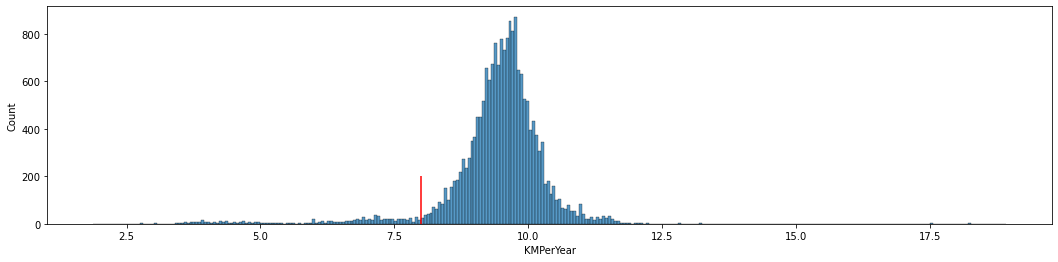

In [169]:
plt.figure(figsize=(18, 4))
sns.histplot(df_train.KMPerYear)
plt.vlines(8, ymin=0, ymax=200, colors='r')

In [170]:
df_train['Rare'] = ((df_train['Prod. year']<2000) & (df_train.KMPerYear<8) | (df_train.KMPerYear>12.5))
if not ('Rare' in num_cols):
    num_cols.append('Rare')

In [171]:
df_train.Rare.value_counts()

False    18999
True       238
Name: Rare, dtype: int64

In [172]:
df_train['isTurbo'] = train['Engine volume'].apply(lambda x: x.split(' ')[-1]=='Turbo')
if not 'isTurbo' in num_cols:
    num_cols.append('isTurbo')

In [173]:
df_train['ft1'] = np.sqrt(df_train.Levy) * (2021 - df_train['Prod. year'])
if not 'ft1' in num_cols:
    num_cols.append('ft1')

### Model Name

In [174]:
len(df_train.Model.apply(lambda x: x.split(' ')[0]).unique())

630

In [175]:
df_train['ModelName'] = df_train.Model.apply(lambda x: x.split(' ')[0])
df_train.loc[df_train.ModelName.apply(lambda x : x.isnumeric()), 'ModelName'] = 'Others'
df_train.loc[df_train.ModelName.apply(lambda x : '+' in x), 'ModelName'] = 'Others'

In [184]:
import category_encoders as ce

In [223]:
name_encoder = ce.BaseNEncoder(cols=['ModelName'], return_df = True, base=6)
name_encoder.fit(df_train[['ModelName']])
model_df = name_encoder.transform((df_train[['ModelName']]))
model_df.sample(5)

,ModelName_0,ModelName_1,ModelName_2,ModelName_3,ModelName_4
11508,0,1,2,3,2
2187,0,0,1,3,1
4692,0,0,3,1,5
4347,0,0,2,5,5
854,0,0,0,0,1


# Modelling

In [224]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

X = pd.concat([df_train[num_cols], df_dummies, model_df], axis=1)
y = df_train.cappedLogPrice
X_cols = X.columns.to_list()

X_train, X_test, y_train, y_test = train_test_split(X[X_cols], y, 
                                                    test_size = 0.2, random_state = 42)#,
                                                    #stratify = df_train.cluster)
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_cols)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test), columns=X_cols)

In [225]:
X_train.head()

,Levy,Prod. year,Engine volume,Airbags,Cylinders,Mileage,KMPerYear,Rare,isTurbo,ft1,...,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,ModelName_0,ModelName_1,ModelName_2,ModelName_3,ModelName_4
7808,0,2004,1.3,2,4,11.976659,9.143446,False,False,0.000000,...,0,0,1,0,0,0,0,4,4,4
16766,364,2012,1.0,4,4,11.982929,9.785705,False,False,171.709056,...,0,0,0,0,0,0,2,0,0,4
7285,1493,2016,3.5,4,4,10.693739,9.084301,False,False,193.196791,...,0,0,0,1,0,0,0,4,3,4
15712,891,2016,2.0,4,4,11.627691,10.018253,False,False,149.248116,...,0,0,0,1,0,0,1,5,5,5
16562,0,2011,2.4,9,4,12.711926,10.409341,False,False,0.000000,...,0,0,0,0,0,0,1,5,5,5


# Random Forest

In [226]:
from sklearn.ensemble import RandomForestRegressor

In [227]:
rf_best = RandomForestRegressor(bootstrap=False, max_depth=80, max_features='sqrt', random_state=42,
                      min_samples_split=5, n_estimators=133).fit(X_train_scaled, y_train)
rf_best.score(X_test_scaled, y_test)

0.7081386271003306

In [207]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(
        np.exp(y_test), 
        np.exp(rf_best.predict(X_test_scaled))))

0.8033074878828894

<AxesSubplot:xlabel='Importance', ylabel='Feature'>

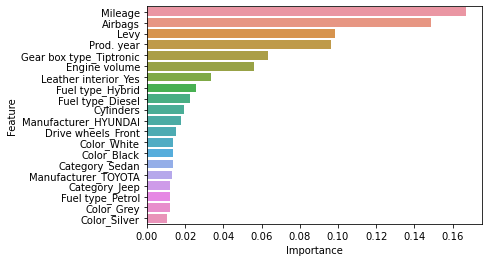

In [33]:
df_importance = pd.DataFrame(rf_best.feature_importances_, columns = ['Importance'])
df_importance['Feature'] = X_cols
df_importance = df_importance[['Feature', 'Importance']].sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=df_importance.head(20))

---


In [228]:
df_test = test.drop(columns = 'ID')

df_test.loc[df_test.Levy=='-', 'Levy'] = 0
df_test.loc[df_test.Doors=='04-May', 'Doors'] = '4-May'
df_test.loc[df_test.Doors=='02-Mar', 'Doors'] = '2-Mar'

df_test.Mileage = df_test.Mileage.apply(lambda x: int(x[:-3]))
df_test.loc[df_test.Mileage==0, 'Mileage'] = None
df_test['Mileage'] = df_test['Mileage'].\
                        fillna(df_test.groupby('Prod. year')['Mileage'].transform('median'))
df_test.Mileage.fillna(df_test.Mileage.mean(), inplace=True)
df_test.Mileage = np.log(df_test.Mileage)

df_test['Engine volume'].apply(lambda x: float(x.split(' ')[0]))
df_test['Engine volume'] = df_test['Engine volume'].apply(lambda x: float(x.split(' ')[0]))

df_test.Levy = df_test.Levy.astype(int)
df_test.loc[df_test.Cylinders > 15, 'Cylinders'] = 15

df_test.loc[~df_test.Manufacturer.isin(top_manufacturers), 'Manufacturer'] = 'Other'
df_dummies_test = pd.get_dummies(df_test[cat_cols], drop_first=True)

df_test['Rare'] = (df_test['Prod. year']<2000) & (df_test.Mileage<10.6)
df_test.Rare.value_counts()
df_test['KMPerYear'] = np.exp(df_test.Mileage) / (2021 - df_test['Prod. year'])
df_test['isTurbo'] = test['Engine volume'].apply(lambda x: x.split(' ')[-1]=='Turbo')
df_test['ft1'] = np.sqrt(df_test.Levy) * (2021 - df_test['Prod. year'])

df_test['ModelName'] = df_test.Model.apply(lambda x: x.split(' ')[0])
df_test.loc[df_test.ModelName.apply(lambda x : x.isnumeric()), 'ModelName'] = 'Others'
df_test.loc[df_test.ModelName.apply(lambda x : '+' in x), 'ModelName'] = 'Others'
model_df_test = name_encoder.transform(df_test['ModelName'])

#############################################

X_submit = pd.concat([df_test[num_cols], df_dummies_test, model_df_test], axis=1)
X_submit_scaled = pd.DataFrame(scaler.transform(X_submit), columns=X_cols)
X_submit_scaled.head()

,Levy,Prod. year,Engine volume,Airbags,Cylinders,Mileage,KMPerYear,Rare,isTurbo,ft1,...,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,ModelName_0,ModelName_1,ModelName_2,ModelName_3,ModelName_4
0,-1.111134,0.191152,-0.348790,0.788730,-0.486096,0.257966,16321.240220,-0.113287,3.009679,-1.042803,...,-0.186076,-0.496871,-0.077974,-0.549095,-0.074084,0.0,-0.958103,1.544171,1.127897,-1.480800
1,-1.111134,0.191152,0.103422,0.788730,-0.486096,-1.413790,2938.993255,-0.113287,-0.332261,-1.042803,...,-0.186076,-0.496871,-0.077974,-0.549095,-0.074084,0.0,0.476162,1.544171,1.127897,1.442092
2,-1.111134,-1.039436,-0.914055,0.326277,-0.486096,0.408518,10707.501027,-0.113287,-0.332261,-1.042803,...,-0.186076,-0.496871,12.824707,-0.549095,-0.074084,0.0,1.910427,-1.326064,0.624498,0.272935
3,0.607795,0.191152,1.007846,1.251183,1.179761,0.251160,16207.831348,-0.113287,-0.332261,0.750367,...,-0.186076,-0.496871,-0.077974,-0.549095,-0.074084,0.0,1.910427,-0.177970,-0.885700,-0.311643
4,-1.111134,-3.149016,-0.801002,-1.523534,-0.486096,0.578801,7280.932948,-0.113287,-0.332261,-1.042803,...,-0.186076,-0.496871,-0.077974,-0.549095,-0.074084,0.0,-0.958103,-1.326064,1.127897,0.857513


In [229]:
y_submit = pd.DataFrame(np.round(np.exp(rf_best.predict(X_submit_scaled)), 2) , columns=['Price'])
y_submit.to_csv('submission.csv', index=False)